In [1]:
import sys
import numpy
import pandas

print("Python version:", sys.version)
print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)

Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
NumPy version: 2.2.6
Pandas version: 2.3.2


In [3]:
# 1️⃣ Import required libraries
import pandas as pd
import numpy as np
import string
import re
import nltk

In [4]:
# Download NLTK resources (only first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
# 2️⃣ Load the raw dataset
df = pd.read_csv('D:/mental_health_project/data/raw/Combined Data.csv')

In [10]:
# 3️⃣ Inspect the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (53043, 3)


In [11]:
print("Columns:", df.columns)

Columns: Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [12]:
print("First 5 rows:\n", df.head())

First 5 rows:
    Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [13]:
# 4️⃣ Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Unnamed: 0      0
statement     362
status          0
dtype: int64


In [14]:
print(df.columns)


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [15]:
df = df.dropna(subset=['statement'])  # replace 'statement' with your actual text column if different


In [16]:
print("Shape after removing missing posts:", df.shape)


Shape after removing missing posts: (52681, 3)


In [17]:
df = df.drop_duplicates(subset=['statement'])
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (51073, 3)


In [18]:
print(df.columns)


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [19]:
# Rename Unnamed: 0 as post_id (optional)
df = df.rename(columns={'Unnamed: 0': 'post_id'})


In [20]:
text_col = 'statement'

In [21]:
#Text preprocessing function
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [22]:
#Apply text cleaning to the 'statement' column
df['cleaned_statement'] = df[text_col].apply(clean_text)

In [23]:
#Quick check of cleaned text
print(df[['post_id', 'statement', 'cleaned_statement']].head(5))

   post_id                                          statement  \
0        0                                         oh my gosh   
1        1  trouble sleeping, confused mind, restless hear...   
2        2  All wrong, back off dear, forward doubt. Stay ...   
3        3  I've shifted my focus to something else but I'...   
4        4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  


In [26]:
#Save cleaned dataset
df.to_csv('D:/mental_health_project/data/raw/Combined Data.csv', index=False)
print("Cleaned dataset saved to data/processed/Combined_Data_Cleaned.csv")

Cleaned dataset saved to data/processed/Combined_Data_Cleaned.csv


In [33]:
import os

os.makedirs('D:/mental_health_project/data/processed', exist_ok=True)


In [34]:
cleaned_file_path = 'D:/mental_health_project/data/processed/Combined_Data_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: D:/mental_health_project/data/processed/Combined_Data_Cleaned.csv


# Preprocessing

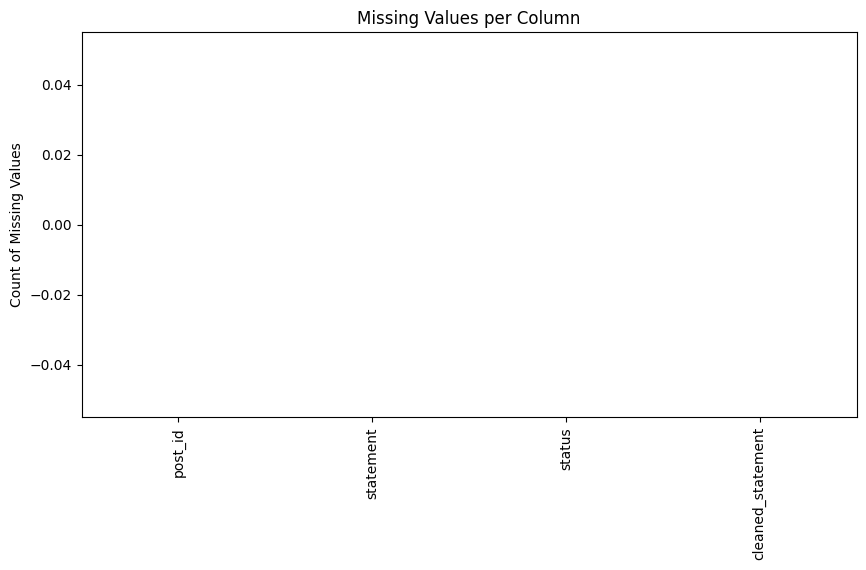

In [36]:
import matplotlib.pyplot as plt

df.isnull().sum().plot(kind='bar', figsize=(10,5))
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

